In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

20 files found.


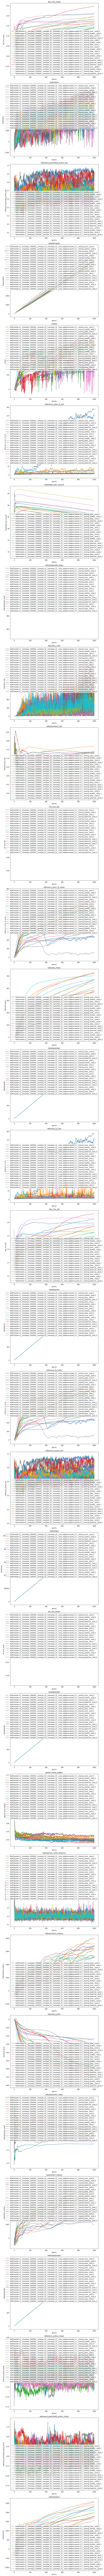

In [4]:
dfs = []
columns = []
c = 0
for filename in glob.iglob("Half*/progress.csv", recursive=True):
    statinfo = os.stat(filename)
    if statinfo.st_size > 0:
        df = pd.read_csv(filename)
        for column in df:
            if column not in columns:
                columns.append(column)
        dfs.append((filename[:-13], df))
        c += 1

print("{} files found.".format(c))
    

plt.subplots(len(columns), 1, figsize=(10,8*len(columns)))

i = 0
for column in columns:
    i += 1
    plt.subplot(len(columns), 1, i)
    plt.xlabel("epochs")
    plt.ylabel(column)
    plt.title(column)
    for (name, df) in dfs:
        if column in df:
            plt.plot(df[column].as_matrix(), label=name)
    plt.legend()
plt.tight_layout()
plt.show()